# Lab-7


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create the dataset and save it as a CSV file
data = {
    'X1': [2.781084, 1.465489, 3.396562, 1.38807, 3.064072, 7.627531, 5.332441, 6.922597, 8.675419, 7.673756],
    'X2': [2.550537, 2.362125, 4.400294, 1.85022, 3.005306, 2.759262, 2.088627, 1.771064, -0.24207, 3.508563],
    'Y': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)
df.to_csv('dataset.csv', index=False)


# Q1


Create the following data set for two independent variable (X1,X2) and one dependent variable (Y) in CSV.
Apply the Logistic Regression to perform the following.

a. Calculate the coefficients (B0, B1 and B2).

b. Apply the sigmoid function to get the prediction and calculate error.

c. From the predicted values calculate the accuracy.

d. List the model parameters along with error for every instance of the training data.

e. Plot the graph of B1 v/s error and B2 v/s error.

f. Use scikit learn model to repeat the above steps and compare the results.

Accuracy (Manual): 1.0
Iteration 1 - B0: 0.0000, B1: 0.0121, B2: -0.0021, Error: 0.6931
Iteration 2 - B0: -0.0001, B1: 0.0233, B2: -0.0046, Error: 0.6786
Iteration 3 - B0: -0.0004, B1: 0.0337, B2: -0.0072, Error: 0.6658
Iteration 4 - B0: -0.0007, B1: 0.0435, B2: -0.0102, Error: 0.6546
Iteration 5 - B0: -0.0012, B1: 0.0526, B2: -0.0133, Error: 0.6445
Iteration 6 - B0: -0.0018, B1: 0.0611, B2: -0.0165, Error: 0.6355
Iteration 7 - B0: -0.0024, B1: 0.0691, B2: -0.0200, Error: 0.6273
Iteration 8 - B0: -0.0031, B1: 0.0766, B2: -0.0236, Error: 0.6199
Iteration 9 - B0: -0.0038, B1: 0.0836, B2: -0.0273, Error: 0.6130
Iteration 10 - B0: -0.0047, B1: 0.0903, B2: -0.0311, Error: 0.6067
Iteration 11 - B0: -0.0055, B1: 0.0967, B2: -0.0351, Error: 0.6008
Iteration 12 - B0: -0.0064, B1: 0.1027, B2: -0.0391, Error: 0.5952
Iteration 13 - B0: -0.0074, B1: 0.1084, B2: -0.0432, Error: 0.5900
Iteration 14 - B0: -0.0084, B1: 0.1138, B2: -0.0473, Error: 0.5851
Iteration 15 - B0: -0.0094, B1: 0.1190, B2: -0.05

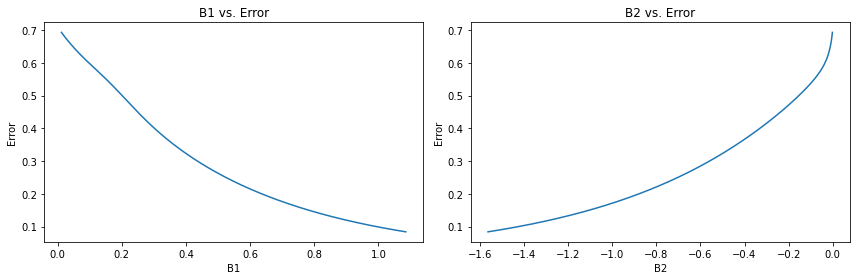

Scikit-learn Model Accuracy: 1.0
Scikit-learn Model Coefficients (B0, B1, B2): [-4.551633521124652, 1.1838341556362018, -0.3580350286001871]


In [41]:
# Load the dataset
data = pd.read_csv("dataset.csv")

# Initialize coefficients
B0 = 0
B1 = 0
B2 = 0

# Learning rate (alpha) and number of iterations
alpha = 0.01
num_iterations = 1000

# Lists to store coefficients and errors for each iteration
parameters = []
errors = []

# Logistic Regression training
for _ in range(num_iterations):
    linear_combination = B0 + B1 * df['X1'] + B2 * df['X2']
   
    predictions = 1 / (1 + np.exp(-linear_combination))
   
    error = -np.mean(df['Y'] * np.log(predictions) + (1 - df['Y']) * np.log(1 - predictions))
   
    B0 -= alpha * np.mean(predictions - df['Y'])
    B1 -= alpha * np.mean((predictions - df['Y']) * df['X1'])
    B2 -= alpha * np.mean((predictions - df['Y']) * df['X2'])
   
    parameters.append((B0, B1, B2))
    errors.append(error)

# Calculate accuracy using the manual model
predicted_labels = (1 / (1 + np.exp(-B0 - B1 * df['X1'] - B2 * df['X2'])) >= 0.5).astype(int)
accuracy = (predicted_labels == df['Y']).mean()
print("Accuracy (Manual):", accuracy)

# List model parameters (B0, B1, B2) and errors for each iteration
for i in range(len(parameters)):
    print(f"Iteration {i + 1} - B0: {parameters[i][0]:.4f}, B1: {parameters[i][1]:.4f}, B2: {parameters[i][2]:.4f}, Error: {errors[i]:.4f}")

# Plot B1 vs. Error and B2 vs. Error
B1_values = [param[1] for param in parameters]
B2_values = [param[2] for param in parameters]

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(B1_values, errors)
plt.xlabel('B1')
plt.ylabel('Error')
plt.title('B1 vs. Error')

plt.subplot(122)
plt.plot(B2_values, errors)
plt.xlabel('B2')
plt.ylabel('Error')
plt.title('B2 vs. Error')

plt.tight_layout()
plt.show()

# Use scikit-learn to compare results
clf = LogisticRegression()
clf.fit(data[['X1', 'X2']], data['Y'])

scikit_learn_coeff = [clf.intercept_[0], clf.coef_[0][0], clf.coef_[0][1]]

scikit_learn_predicted_labels = clf.predict(data[['X1', 'X2']])
scikit_learn_accuracy = accuracy_score(data['Y'], scikit_learn_predicted_labels)
print("Scikit-learn Model Accuracy:", scikit_learn_accuracy)
print("Scikit-learn Model Coefficients (B0, B1, B2):", scikit_learn_coeff)


# Q2


Use above data set for one independent variable (X=X1) and one dependent variable (Y) in CSV.
Applying Logistic Regression, explore the relationship between independent and dependent variables.

a. Calculate the coefficients (B0, and B1).

b. Apply the sigmoid function to get the prediction and calculate error.

c. From the predicted values calculate the accuracy.

d. List the model parameters along with error for every instance of the training data.

e. Plot the graph of B1 v/s error.

f. Visualize the following binary cross entropy function for logistic regression using the above training data
   Plot y=1 and y=0 cases separately, and then plot the combined graph by considering X in X-axis and cost in
   Y-axis.

g. Use scikit learn model to repeat the above steps and compare the results.

Accuracy (Manual): 0.9
Iteration 1 - B0: 0.0000, B1: 0.0121, Error: 0.6931
Iteration 2 - B0: -0.0001, B1: 0.0232, Error: 0.6791
Iteration 3 - B0: -0.0004, B1: 0.0336, Error: 0.6671
Iteration 4 - B0: -0.0008, B1: 0.0431, Error: 0.6569
Iteration 5 - B0: -0.0013, B1: 0.0520, Error: 0.6481
Iteration 6 - B0: -0.0020, B1: 0.0602, Error: 0.6405
Iteration 7 - B0: -0.0027, B1: 0.0678, Error: 0.6339
Iteration 8 - B0: -0.0035, B1: 0.0749, Error: 0.6283
Iteration 9 - B0: -0.0044, B1: 0.0815, Error: 0.6233
Iteration 10 - B0: -0.0053, B1: 0.0876, Error: 0.6190
Iteration 11 - B0: -0.0063, B1: 0.0934, Error: 0.6153
Iteration 12 - B0: -0.0074, B1: 0.0987, Error: 0.6120
Iteration 13 - B0: -0.0085, B1: 0.1037, Error: 0.6091
Iteration 14 - B0: -0.0097, B1: 0.1084, Error: 0.6066
Iteration 15 - B0: -0.0110, B1: 0.1128, Error: 0.6043
Iteration 16 - B0: -0.0122, B1: 0.1170, Error: 0.6023
Iteration 17 - B0: -0.0136, B1: 0.1208, Error: 0.6004
Iteration 18 - B0: -0.0149, B1: 0.1245, Error: 0.5988
Iteration 19 - 

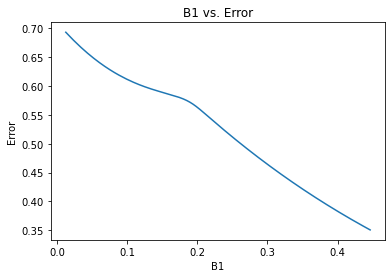

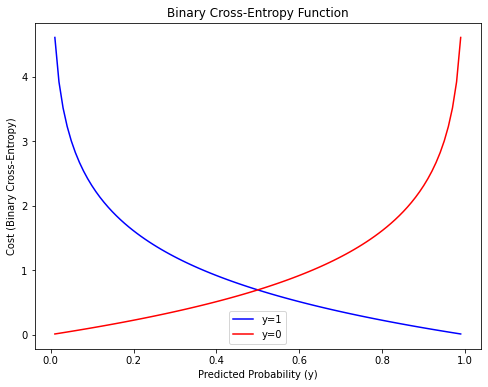

Scikit-learn Model Accuracy: 1.0
Scikit-learn Model Coefficients (B0, B1): [-5.720494256396305, 1.2255309487485415]


In [43]:
# Load the dataset
data = pd.read_csv("dataset.csv")
X1 = data['X1']
Y = data['Y']

# Add a bias term
X0 = np.ones(X1.shape)

# Stack the features together
X = np.column_stack((X0, X1))

# Initialize coefficients
B0 = 0
B1 = 0

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Learning rate (alpha) and number of iterations
alpha = 0.01
num_iterations = 1000

# Lists to store coefficients and errors for each iteration
parameters = []
errors = []

# Logistic Regression training
for _ in range(num_iterations):
    linear_combination = B0 + B1 * X1
   
    predictions = sigmoid(linear_combination)
   
    error = -np.mean(Y * np.log(predictions) + (1 - Y) * np.log(1 - predictions))
   
    B0 -= alpha * np.mean(predictions - Y)
    B1 -= alpha * np.mean((predictions - Y) * X1)
   
    parameters.append((B0, B1))
    errors.append(error)

# Calculate accuracy using the manual model
predicted_labels = (sigmoid(B0 + B1 * X1) >= 0.5).astype(int)
accuracy = (predicted_labels == Y).mean()
print("Accuracy (Manual):", accuracy)

# List model parameters (B0, B1) and errors for each iteration
for i in range(len(parameters)):
    print(f"Iteration {i + 1} - B0: {parameters[i][0]:.4f}, B1: {parameters[i][1]:.4f}, Error: {errors[i]:.4f}")

# Plot B1 vs. Error
B1_values = [param[1] for param in parameters]

plt.figure(figsize=(6, 4))
plt.plot(B1_values, errors)
plt.xlabel('B1')
plt.ylabel('Error')
plt.title('B1 vs. Error')
plt.show()

# Visualize Binary Cross-Entropy Function
X_range = np.linspace(0.01, 0.99, 100)
cost_y1 = -np.log(X_range)
cost_y0 = -np.log(1 - X_range)

plt.figure(figsize=(8, 6))
plt.plot(X_range, cost_y1, label='y=1', color='blue')
plt.plot(X_range, cost_y0, label='y=0', color='red')
plt.xlabel('Predicted Probability (y)')
plt.ylabel('Cost (Binary Cross-Entropy)')
plt.title('Binary Cross-Entropy Function')
plt.legend()
plt.show()

# Use scikit-learn for comparison
clf = LogisticRegression()
clf.fit(X1.values.reshape(-1, 1), Y)

scikit_learn_coeff = [clf.intercept_[0], clf.coef_[0][0]]

scikit_learn_predicted_labels = clf.predict(X1.values.reshape(-1, 1))
scikit_learn_accuracy = accuracy_score(Y, scikit_learn_predicted_labels)
print("Scikit-learn Model Accuracy:", scikit_learn_accuracy)
print("Scikit-learn Model Coefficients (B0, B1):", scikit_learn_coeff)


# Q3

Use the above data set for two independent variable (X1,X2) and one dependent variable (Y) in CSV.
Apply the Logistic Regression with SGD to perform the following.

a. Calculate the coefficients (B0, B1 and B2) and arrive at different values of B0, B1, B2, and error for 50
   iterations of 5 epochs.

b. Apply the sigmoid function to get the prediction and calculate error.

c. From the predicted values calculate the accuracy.

d. Plot the graph of epoch (X-axis) v/s Accuracy (Y-axis).

e. Use scikit learn model to repeat the above steps and compare the results.

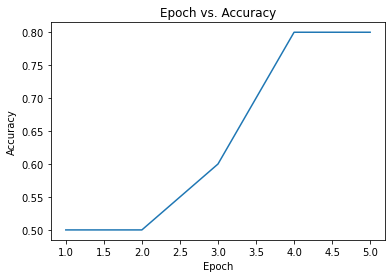

Scikit-learn Model Accuracy: 1.0
Scikit-learn Model Coefficients (B0, B1, B2): [-4.551633521124652, 1.1838341556362018, -0.3580350286001871]


In [45]:
# Load the dataset
data = pd.read_csv("dataset.csv")
X1 = data['X1']
X2 = data['X2']
Y = data['Y']

# Add a bias term
X0 = np.ones(X1.shape)

# Stack the features together
X = np.column_stack((X0, X1, X2))

# Learning rate (alpha) and number of iterations
alpha = 0.01
num_epochs = 5
num_iterations_per_epoch = 10
total_iterations = num_epochs * num_iterations_per_epoch

# Lists to store coefficients and errors for each epoch
coefficients = []
errors = []
epoch_accuracies = []

# Logistic Regression with SGD
B0 = 0
B1 = 0
B2 = 0

for epoch in range(num_epochs):
    epoch_error = 0.0

    for _ in range(num_iterations_per_epoch):
        # Calculate the predicted values
        linear_combination = B0 + B1 * X1 + B2 * X2
        predictions = 1 / (1 + np.exp(-linear_combination))

        # Calculate the error
        error = Y - predictions
        epoch_error += np.mean(error)

        # Update coefficients using SGD
        B0 += alpha * np.mean(error)
        B1 += alpha * np.mean(error * X1)
        B2 += alpha * np.mean(error * X2)

    # Store coefficients for this epoch
    coefficients.append((B0, B1, B2))

    # Calculate average error for this epoch
    epoch_error /= num_iterations_per_epoch
    errors.append(epoch_error)

    # Calculate accuracy for this epoch
    predicted_labels = (sigmoid(B0 + B1 * X1 + B2 * X2) >= 0.5).astype(int)
    epoch_accuracy = (predicted_labels == Y).mean()
    epoch_accuracies.append(epoch_accuracy)

# Plot epoch vs. accuracy
plt.plot(range(1, num_epochs + 1), epoch_accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs. Accuracy')
plt.show()

# Use scikit-learn for comparison
clf = LogisticRegression()
clf.fit(X[:, 1:], Y)

scikit_learn_coeff = [clf.intercept_[0], clf.coef_[0][0], clf.coef_[0][1]]

scikit_learn_predicted_labels = clf.predict(X[:, 1:])
scikit_learn_accuracy = accuracy_score(Y, scikit_learn_predicted_labels)
print("Scikit-learn Model Accuracy:", scikit_learn_accuracy)
print("Scikit-learn Model Coefficients (B0, B1, B2):", scikit_learn_coeff)
